# **K-NEAREST NEIGHBORS**

# **1. KNN BASIC**

In [ ]:
import numpy as np

In [ ]:
X_data = [[1.4, 0.2],
          [1.3, 0.4],
          [4.0, 1.0],
          [4.7, 1.4]]
y_data = [0, 0, 1, 1]

In [ ]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [ ]:
X_data1

array([[1.4, 0.2],
       [1.3, 0.4],
       [4. , 1. ],
       [4.7, 1.4]])

In [ ]:
y_data

array([0, 0, 1, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_data, y_data)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
x_test = np.array([[2.4, 0.8]])

In [ ]:
classifier.kneighbors(x_test)

(array([[1.16619038, 1.17046999, 1.61245155, 2.37697286]]),
 array([[0, 1, 2, 3]]))

In [ ]:
classifier.predict(x_test)

array([0])

# **2. KNN For Regression**

## **2.1. Load data**

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

## **2.2. Split data**

In [ ]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [ ]:
X_test.shape, y_test.shape

((89, 10), (89,))

## **2.3. Normalize Feature**

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **2.4. KNN Regressor**

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

## **2.5. Evaluate**

In [ ]:
y_pred = knn_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

3047.449887640449

In [ ]:
r2_score(y_test, y_pred)

0.42480887066066253

## **2.6. Effect of K**

In [ ]:
k_values = [i for i in range(1, 31)]
scores = []

for k in k_values:
  knn_regressor = KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train, y_train)
  y_pred = knn_regressor.predict(X_test)
  score = r2_score(y_test, y_pred)
  scores.append(np.mean(score))

Text(0, 0.5, 'R2 Score')

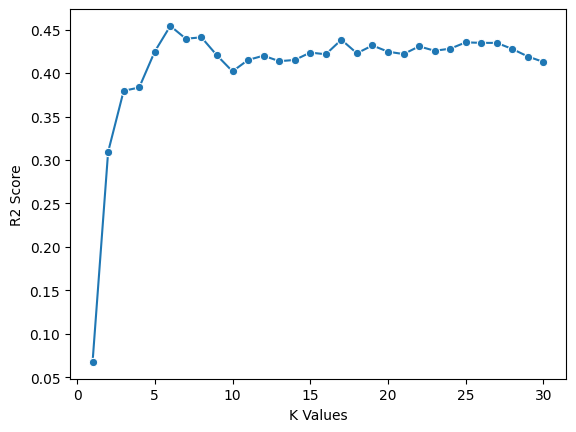

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("R2 Score")

# **3. KNN For Classification**

## **3.1. Load data**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [ ]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## **3.2. Split data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((120, 4), (120,))

## **3.3. Normalize Feature**

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3.4. KNN Classifier**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

## **3.6. Effect of K**

In [ ]:
k_values = [i for i in range(1, 31)]
scores = []

for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  y_pred = knn_classifier.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  scores.append(score)

Text(0, 0.5, 'Accuracy Score')

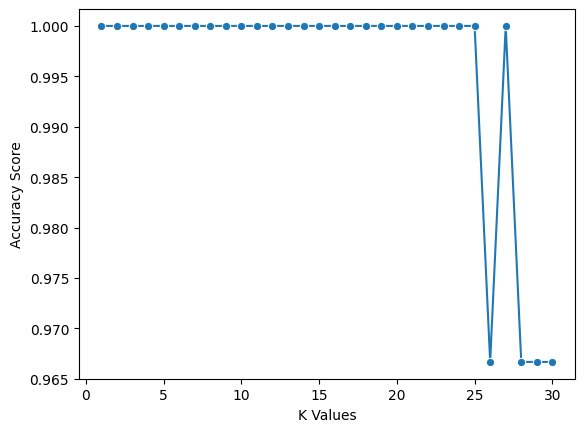

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# **4. KNN for Text Classification**

## **4.1. Load data**

In [ ]:
!pip install -q datasets

In [ ]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
imdb = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
imdb_train, imdb_test = imdb['train'], imdb['test']

In [ ]:
imdb_train['text'][0], imdb_test['label'][0]

('I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [ ]:
len(imdb_train['text']), len(imdb_test['text'])

(25000, 25000)

## **4.2. Convert text to feature**

In [ ]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()

In [ ]:
# Convert text to vector using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()

In [ ]:
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_train['label'])

## **4.3. Normalize Feature**

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4.4. KNN Classifier**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

## **4.5. Evaluate**

**BoW**

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.55628

In [ ]:
f1_score(y_test, y_pred)

0.5013709713669259

In [ ]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60     12500
           1       0.57      0.45      0.50     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.55     25000
weighted avg       0.56      0.56      0.55     25000



**TF-IDF**

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.55628

In [ ]:
f1_score(y_test, y_pred)

0.5013709713669259

In [ ]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60     12500
           1       0.57      0.45      0.50     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.55     25000
weighted avg       0.56      0.56      0.55     25000



# **5. Decision Tree for Classification**

## **5.1. Load data**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

## **5.2. Split data**

In [ ]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

## **5.3. Normalize Fetaure**

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5.4. Decision Tree Classifier**

In [ ]:
# Defining an object for DTC and fitting for whole dataset
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

## **5.5. Evaluate**

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

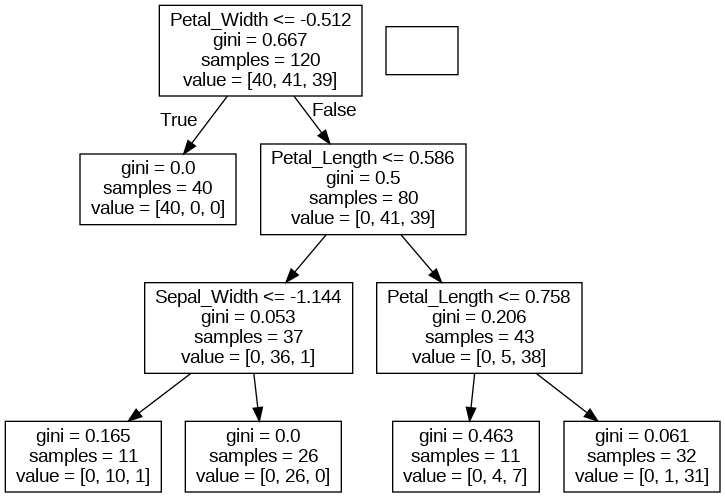

In [ ]:
features = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())